<a href="https://colab.research.google.com/github/patriciamg90/F25-MAT-1630/blob/main/Monte_Carlo_MAT_1630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monte Carlo Methods — A Beginner-Friendly Lesson

**Format:** Google Colab / Jupyter Notebook  
**Created:** 2025-10-29  

This notebook introduces Monte Carlo techniques in a practical, beginner-friendly way.
We'll use plain Python, `random`, `math`, and a bit of `numpy` and `matplotlib` for speed and plotting.
The style is intentionally simple, focused on clear code and step-by-step explanation.

**What you'll learn**
- What "Monte Carlo" means and when to use it  
- How to generate random numbers (uniform, normal, and discrete)  
- Throwing a die simulation  
- Estimating π by simulation (classic dartboard example)  
- Monte Carlo integration (estimating an area / expected value)  
- Convergence and confidence intervals  
- A small simulation: coin/dice experiments and a simple random walk  
- Good habits: seeds, functions, vectorization, and sanity checks

Tip: Run cells top-to-bottom. If something errors, restart runtime and run again.



In [ ]:
import random, math
from statistics import mean, pstdev
import numpy as np
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)
print("Ready to go!")


Ready to go!


## 1. What is Monte Carlo?

Monte Carlo methods use random sampling to estimate quantities that are hard to compute exactly.
Instead of formulas, we simulate many random outcomes and average them.

Common uses:
- Estimating areas or integrals
- Approximating messy probabilities
- Building intuition (dice, cards, random walks)
- Stress-testing algorithms

Key idea: Law of Large Numbers — as samples increase, averages converge to the true value.


In [ ]:
uniform_samples = [random.random() for _ in range(10)]
uniform_samples


[0.6394267984578837,
 0.025010755222666936,
 0.27502931836911926,
 0.22321073814882275,
 0.7364712141640124,
 0.6766994874229113,
 0.8921795677048454,
 0.08693883262941615,
 0.4219218196852704,
 0.029797219438070344]

## 2. Throwing a Die

Before jumping to π estimation, let's warm up with a simple **die simulation**.

We’ll simulate 10,000 throws of a fair six-sided die, count outcomes,
and compare to the theoretical uniform distribution.


Face 1: count= 1617, probability≈0.162
Face 2: count= 1627, probability≈0.163
Face 3: count= 1650, probability≈0.165
Face 4: count= 1689, probability≈0.169
Face 5: count= 1670, probability≈0.167
Face 6: count= 1747, probability≈0.175


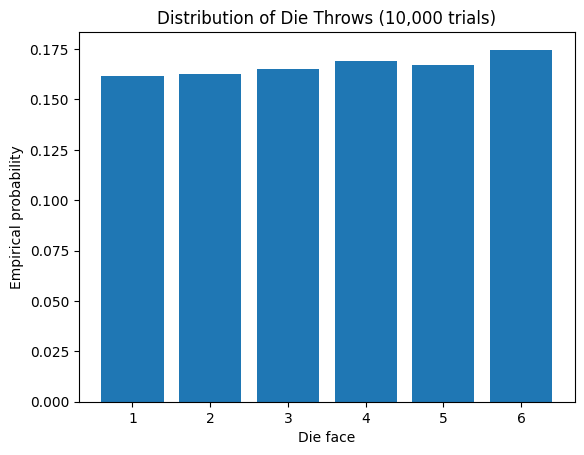

In [ ]:
def throw_die(trials=10_000):
    outcomes = [random.randint(1,6) for _ in range(trials)]
    counts = [outcomes.count(i) for i in range(1,7)]
    probs = [c/trials for c in counts]
    return counts, probs

counts, probs = throw_die()

for i, (c, p) in enumerate(zip(counts, probs), start=1):
    print(f"Face {i}: count={c:>5d}, probability≈{p:.3f}")

plt.bar(range(1,7), probs)
plt.xlabel("Die face")
plt.ylabel("Empirical probability")
plt.title("Distribution of Die Throws (10,000 trials)")
plt.show()


# Estimating π/4 with Monte Carlo Simulation

We’ll estimate the area of a **quarter circle** of radius 1 inside the unit square [0, 1] × [0, 1].

If we drop random points uniformly in the square:
- Points **inside** the quarter circle satisfy `x**2 + y**2 <= 1`.
- The **fraction** of points inside ≈ area of quarter circle / area of square.
- Since area(square) = 1, we have:  
  **π/4 ≈ (inside points) / (total points)**

So multiplying the estimate by 4 gives an estimate for π itself.


In [ ]:
import random, math

def estimate_pi_over_4(n):
    inside = 0
    for _ in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1.0:
            inside += 1
    return inside / n   # fraction ≈ π/4

# Try increasing sample sizes
for n in [100, 1_000, 10_000, 100_000]:
    est = estimate_pi_over_4(n)
    pi_est = 4 * est
    print(f"n={n:>8,d}  π/4≈{est:.6f}  →  π≈{pi_est:.6f}  (error={abs(math.pi - pi_est):.6f})")


n=     100  π/4≈0.830000  →  π≈3.320000  (error=0.178407)
n=   1,000  π/4≈0.782000  →  π≈3.128000  (error=0.013593)
n=  10,000  π/4≈0.783600  →  π≈3.134400  (error=0.007193)
n= 100,000  π/4≈0.784100  →  π≈3.136400  (error=0.005193)


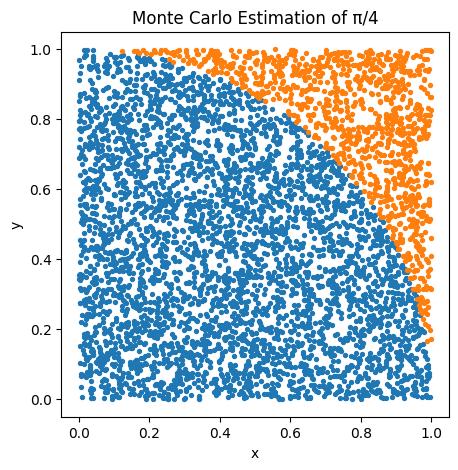

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

n = 5000
xs = np.random.rand(n)
ys = np.random.rand(n)
inside = xs**2 + ys**2 <= 1

plt.figure(figsize=(5,5))
plt.scatter(xs[inside], ys[inside], s=8)
plt.scatter(xs[~inside], ys[~inside], s=8)
plt.title("Monte Carlo Estimation of π/4")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [ ]:
def estimate_pi_numpy(n:int)->float:
    xs = np.random.uniform(-1,1,n)
    ys = np.random.uniform(-1,1,n)
    inside = (xs*xs+ys*ys)<=1
    return 4*inside.mean()

for n in [100_000,1_000_000]:
    pi_hat = estimate_pi_numpy(n)
    print(f"n={n:>9,d} -> π≈{pi_hat:.6f} (error={abs(math.pi-pi_hat):.6f})")


n=  100,000 -> π≈3.140680 (error=0.000913)
n=1,000,000 -> π≈3.140740 (error=0.000853)


## Exercise: Estimating the Area of a Quarter Annulus (Ring Segment)

### Objective
Use Monte Carlo simulation to estimate the **area of a quarter ring** — the region between two quarter circles of radius 1 and radius 0.5 — inside the unit square [0, 1] × [0, 1].

This exercise extends the quarter-circle π/4 example you just ran.  
You’ll reuse the same random-sampling idea, but this time your inclusion condition will check that each random point lies **between** two circle boundaries.

---

### Background
A **quarter annulus** is the area between two quarter circles:
$$
0.5^2 \le x^2 + y^2 \le 1^2
$$
within the first quadrant (x ≥ 0, y ≥ 0).

The exact area is:
$$
A_{\text{true}} = \frac{\pi}{4} \times (1^2 - 0.5^2) = \frac{3\pi}{16} \approx 0.5890
$$

---

### Your Task
1. Copy the structure of the π/4 estimator you already have.  
2. Replace the inside-circle check (`x**2 + y**2 <= 1`) with one that checks if the point is between the **inner** and **outer** radii:


Run the simulation for increasing sample sizes (`n = 1_000, 10_000, 100_000, 1_000_000`).  
4. Compare your estimate to the theoretical value (3π/16).  
5. Compute and print the absolute error.


### Optional Visualization
After your estimator works, plot the sampled points:
- Points inside the quarter ring in one color.  
- Points outside in another.  
This helps confirm visually that your logic is correct.

---

### Discussion Questions
1. How is this experiment similar to the quarter-circle (π/4) case?  
2. Why does adding an inner boundary not make the problem significantly harder?  
3. What happens to your estimate as `n` increases?  
4. How could you extend this idea to estimate the **area of a full ring** or the **volume of a sphere**?

---

In [ ]:
import random, math

def estimate_quarter_ring_area(n):
    inside = 0
    for _ in range(n):
        x = random.random()
        y = random.random()
        r2 = x**2 + y**2
        # TODO: Check if point lies inside the quarter ring region
        if ________________________________:
            inside += 1
    # The area of the square [0,1]×[0,1] is 1, so fraction = area estimate
    return inside / n

for n in [1_000, 10_000, 100_000, 1_000_000]:
    est = estimate_quarter_ring_area(n)
    true_val = (3 * math.pi) / 16
    err = abs(est - true_val)
    print(f"n={n:>8,d}  est≈{est:.6f}  true≈{true_val:.6f}  error={err:.6f}")


NameError: name '________________________________' is not defined

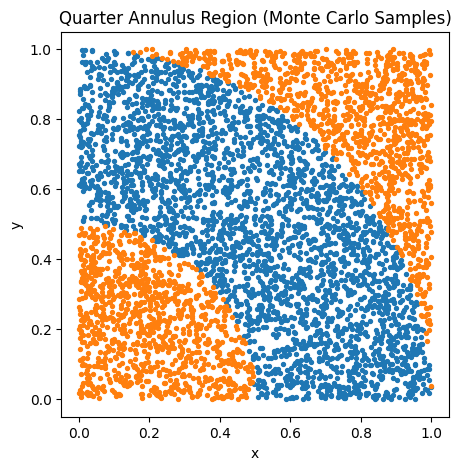

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 5000
xs = np.random.rand(n)
ys = np.random.rand(n)
r2 = xs**2 + ys**2
inside = (r2 <= 1) & (r2 >= 0.5**2)

plt.figure(figsize=(5,5))
plt.scatter(xs[inside], ys[inside], s=8)
plt.scatter(xs[~inside], ys[~inside], s=8)
plt.title("Quarter Annulus Region (Monte Carlo Samples)")
plt.xlabel("x"); plt.ylabel("y")
plt.show()
